# Modeling

##### Aziz Maredia | DSIR-1019 | 01.27.21

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

In [2]:
tracks = pd.read_csv('.././datasets/combined_tracks.csv')

In [3]:
tracks.shape

(1542, 50)

In [4]:
tracks.head()

,track,artist,data_type,popularity_artist,popularity_song,danceability,energy,loudness,speechiness,acousticness,...,r&b,rap,reggae,rock,romance,soul,south_american,swing,techno,trance
0,JustYourSoul - Tchami Remix,Valentino Khan,user_library,64,48.0,0.749,0.846,-3.441,0.0932,0.00403,...,0,1,0,0,0,0,0,0,0,0
1,Moving Men,Myd,user_library,57,60.0,0.815,0.661,-8.208,0.0996,0.10600,...,0,0,0,0,1,0,0,0,0,0
2,Sonate Pacifique,L'Impératrice,user_library,63,63.0,0.558,0.538,-8.853,0.0327,0.62900,...,0,0,0,0,1,1,0,0,0,0
3,Casio,Jungle,user_library,66,67.0,0.816,0.492,-7.464,0.0752,0.43100,...,1,0,0,0,0,1,0,0,0,0
4,"Music Is My Hot, Hot Sex",CSS,user_library,46,0.0,0.742,0.723,-5.620,0.0441,0.01370,...,0,0,0,0,0,0,0,0,0,0


In [5]:
tracks.columns

Index(['track', 'artist', 'data_type', 'popularity_artist', 'popularity_song',
       'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'mode', 'key',
       'time_signature', 'release_date', 'alternative', 'baltic_slavic',
       'bluegrass', 'blues', 'celtic', 'country', 'dance', 'disco', 'edm',
       'electro', 'english', 'folk', 'germanic', 'hip hop', 'house',
       'jam band', 'jazz', 'other', 'piano', 'pop', 'psychedelic', 'punk',
       'r&b', 'rap', 'reggae', 'rock', 'romance', 'soul', 'south_american',
       'swing', 'techno', 'trance'],
      dtype='object')

In [6]:
def clean_data(df):
    
    df['popularity_song'] = df['popularity_song'] / 100
    df['popularity_artist'] = df['popularity_artist'] / 100
    df['loudness'] = (df['loudness'] / 60) * -1
    
    df['release_date'] = [int(i[:4]) for i in df['release_date']]
    
    new_dates = []
    
    for date in df['release_date']:
        if date < 1950:
            new_dates.append('Pre_50s')
        elif date >= 1950 and date < 1960:
            new_dates.append('50s')
        elif date >= 1960 and date < 1970:
            new_dates.append('60s')
        elif date >= 1970 and date < 1980:
            new_dates.append('70s')
        elif date >= 1980 and date < 1990:
            new_dates.append('80s')
        elif date >= 1990 and date < 2000:
            new_dates.append('90s')
        elif date >= 2000 and date < 2010:
            new_dates.append('2000s')
        elif date >= 2010:
            new_dates.append('Post_2010s')
        else:
            new_dates.append('Date not available') 
    
    df['release_date'] = new_dates
    
    df = pd.get_dummies(df, columns = ['key', 'release_date', 'time_signature'])
    
    mms = MinMaxScaler()
    
    df[['tempo']] = mms.fit_transform(df[['tempo']])
    
    return df

In [7]:
combined = clean_data(tracks)
combined.shape

(1542, 69)

In [8]:
combined.head()

,track,artist,data_type,popularity_artist,popularity_song,danceability,energy,loudness,speechiness,acousticness,...,release_date_2000s,release_date_60s,release_date_70s,release_date_80s,release_date_90s,release_date_Post_2010s,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,JustYourSoul - Tchami Remix,Valentino Khan,user_library,0.64,0.48,0.749,0.846,0.057350,0.0932,0.00403,...,0,0,0,0,0,1,0,0,1,0
1,Moving Men,Myd,user_library,0.57,0.60,0.815,0.661,0.136800,0.0996,0.10600,...,0,0,0,0,0,1,0,1,0,0
2,Sonate Pacifique,L'Impératrice,user_library,0.63,0.63,0.558,0.538,0.147550,0.0327,0.62900,...,0,0,0,0,0,1,0,0,1,0
3,Casio,Jungle,user_library,0.66,0.67,0.816,0.492,0.124400,0.0752,0.43100,...,0,0,0,0,0,1,0,0,1,0
4,"Music Is My Hot, Hot Sex",CSS,user_library,0.46,0.00,0.742,0.723,0.093667,0.0441,0.01370,...,1,0,0,0,0,0,0,0,1,0


In [9]:
user_tracks_reg = combined.loc[combined['data_type'] == 'user_library', :].reset_index(drop = True)

album_tracks_reg = combined.loc[combined['data_type'] == 'album', :].reset_index(drop = True)

### PCA

In [10]:
X = combined.drop(columns = ['track', 'artist', 'data_type'])

In [25]:
tracks_pca = PCA().fit(X)
cumsum_array = np.cumsum(tracks_pca.explained_variance_ratio_)

In [32]:
tracks_pca.explained_variance_ratio_

array([1.81448997e-01, 9.28043999e-02, 7.20573348e-02, 5.83448303e-02,
       3.57413311e-02, 3.25934405e-02, 3.11698489e-02, 2.71928939e-02,
       2.62652850e-02, 2.45489989e-02, 2.42625170e-02, 2.28843184e-02,
       2.26443124e-02, 2.18682846e-02, 2.17747651e-02, 2.05865529e-02,
       1.90865342e-02, 1.79057780e-02, 1.76719249e-02, 1.68202039e-02,
       1.58028410e-02, 1.50258746e-02, 1.46588486e-02, 1.35205321e-02,
       1.27633255e-02, 1.16850198e-02, 1.03784922e-02, 9.67273019e-03,
       8.84280163e-03, 8.47320691e-03, 7.17869872e-03, 7.03410960e-03,
       6.63246165e-03, 6.30115580e-03, 5.82553369e-03, 5.42190137e-03,
       4.83830626e-03, 4.65534889e-03, 4.36286812e-03, 4.29530983e-03,
       4.05815636e-03, 3.39425803e-03, 3.01813094e-03, 2.98447981e-03,
       2.84882368e-03, 2.45376816e-03, 2.30870574e-03, 2.07585579e-03,
       1.77720167e-03, 1.37267672e-03, 1.28866265e-03, 1.24444237e-03,
       1.06694284e-03, 1.01842945e-03, 8.40017057e-04, 7.93808597e-04,
      

In [26]:
cumsum_array

array([0.181449  , 0.2742534 , 0.34631073, 0.40465556, 0.44039689,
       0.47299033, 0.50416018, 0.53135308, 0.55761836, 0.58216736,
       0.60642988, 0.6293142 , 0.65195851, 0.67382679, 0.69560156,
       0.71618811, 0.73527465, 0.75318042, 0.77085235, 0.78767255,
       0.80347539, 0.81850127, 0.83316012, 0.84668065, 0.85944397,
       0.87112899, 0.88150749, 0.89118022, 0.90002302, 0.90849622,
       0.91567492, 0.92270903, 0.92934149, 0.93564265, 0.94146818,
       0.94689009, 0.95172839, 0.95638374, 0.96074661, 0.96504192,
       0.96910007, 0.97249433, 0.97551246, 0.97849694, 0.98134577,
       0.98379954, 0.98610824, 0.9881841 , 0.9899613 , 0.99133398,
       0.99262264, 0.99386708, 0.99493402, 0.99595245, 0.99679247,
       0.99758628, 0.99828213, 0.99889516, 0.99920491, 0.99950119,
       0.99969639, 0.99985903, 1.        , 1.        , 1.        ,
       1.        ])

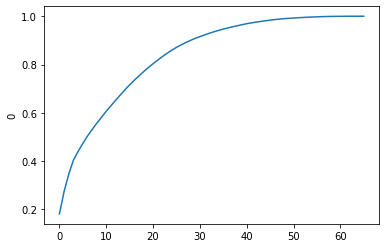

In [27]:
cumsum_df = pd.DataFrame(cumsum_array)

sns.lineplot(x = cumsum_df.index, y = cumsum_df[0]);

In [30]:
def find_optimal_components(array):

    for i in enumerate(array[:len(array)-1]):
        diff = array[i[0] + 1] - i[1]
        if diff < 0.025:
            return i[0]
    
    return 8
    
find_optimal_components(cumsum_array)

8

In [16]:
pca = PCA(n_components = find_optimal_components(y), random_state = 42)
combined_pca = pd.DataFrame(pca.fit_transform(X))
combined_pca = pd.concat([combined[['track', 'artist', 'data_type']], combined_pca], axis = 1)

In [17]:
user_tracks_pca = combined_pca.loc[combined_pca['data_type'] == 'user_library', :].reset_index(drop = True)
album_tracks_pca = combined_pca.loc[combined_pca['data_type'] == 'album', :].reset_index(drop = True)

In [18]:
user_tracks_pca

,track,artist,data_type,0,1,2,3,4,5
0,JustYourSoul - Tchami Remix,Valentino Khan,user_library,0.647620,-0.299273,-0.202799,-1.177543,-0.339147,-0.331130
1,Moving Men,Myd,user_library,0.343146,0.322212,0.398716,-0.087139,0.062835,-0.019174
2,Sonate Pacifique,L'Impératrice,user_library,-0.004642,0.519992,0.521350,0.320611,0.297517,-0.199293
3,Casio,Jungle,user_library,-0.194213,0.555231,-0.589245,0.670799,0.784529,0.105550
4,"Music Is My Hot, Hot Sex",CSS,user_library,0.517109,0.470208,-0.252753,0.506669,-1.049025,0.215753
...,...,...,...,...,...,...,...,...,...
1519,Five Hours,Deorro,user_library,1.655949,-0.549476,-0.317440,0.307126,-0.282864,0.099851
1520,Cut Your Teeth - Kygo Radio Edit,Kyla La Grange,user_library,0.400008,0.030285,-0.276187,0.568974,0.000627,0.006433
1521,Epsilon - Original Mix,Kygo,user_library,1.185961,-0.320679,-0.200770,0.408743,-0.109688,0.199810
1522,Cut Your Teeth - Kygo Remix,Kyla La Grange,user_library,0.408511,0.064966,-0.295135,0.555105,0.001901,0.027260


In [19]:
user_tracks_reg.to_csv('.././datasets/user_tracks_reg.csv', index = False)
album_tracks_reg.to_csv('.././datasets/album_tracks_reg.csv', index = False)

user_tracks_pca.to_csv('.././datasets/user_tracks_pca.csv', index = False)
album_tracks_pca.to_csv('.././datasets/album_tracks_pca.csv', index = False)